# Pakete

## Code in Dateien, Module und Pakete aufteilen

Größere Programme enthalten oft dutzende Klassen mit hunderten Funktionen und vielen tausend Zeilen Code. Hier wird es sehr schnell schwer einen Überblick zu behalten, wenn alle Klassen in einer Datei definiert sind. Insbesondere wenn verschiedene Programmierer an verschiedenen Stellen im Programm arbeiten, kommt es dann sehr schnell zu Versionskonflikten, wenn Leute an ähnlichen Dateien arbeiten.

Um dies organisiert und übersichtlich zu halten, wird Code in mehrere Dateien mit der Erweiterung `.py` aufgespalten. Dabei ist es üblich jeweils eine Datei
-  pro Klasse, wenn Klassen definiert werden
-  pro Thema, wenn Hilfsfunktionen definiert werden (z.B. Mathematik-Funktionen, …)
-  pro Aufgabenbereich, wenn (z.B. Laden von Daten getrennt von deren Verarbeitung. So kann man z.B. später andere Verarbeitungsschritte definieren und das Laden wiederverwenden)

Speichern wir jede Klasse der Geometrieelemente aus dem Teil der [Klassendefinition](7a_Objects.ipynb) aus der letzten Vorlesung so hätten wir dann z.B. eine Projektstruktur entsprechend:

- 📁 geometry
    - 📄 [ImmutablePoint.py](geometry/points/ImmutablePoint.py)
    - 📄 [Point.py](geometry/points/Point.py)
    - 📄 [Line.py](geometry/shapes/Line.py)
    - 📄 [Pentagon.py](geometry/shapes/Pentagon.py)
    - 📄 [Polygon.py](geometry/shapes/Polygon.py)
    - 📄 [Tetragon.py](geometry/shapes/Tetragon.py)
    - 📄 [Triangle.py](geometry/shapes/Triangle.py)

<!-- <center><img src="images/files.png" style="width: 40ex"></center> -->

Dabei enthält jede Datei nur den Code der gleichnamigen Klasse, auch wenn dies nur wenige Zeilen sind, wie im Fall der Klassen `Triangle`, `Tetragon` und `Pentagon`. Entscheidend ist, dass wenn ein Programmierer nach dem Code für eine Klasse sucht, er genau sieht in welcher Datei dieser zu finden ist und nicht groß suchen muss.

Noch größere Projekte spalten man in mehrere *Module* indem man weitere Unterverzeichnisse anlegt. So wollen wir z.B. alle generischen Klassen für Punkte in das Verzeichnis `points` gruppieren und alle geometrischen Formen in das Verzeichnis `shapes`. So lassen sich größere Projekte gut strukturieren.

Die Summe aller Module formt dann ein *Package*. In diesem Fall das Package `geometry`, welches wir in verschiedenen Implementierungen wieder verwenden können.

- 📁 geometry
    - 📁 points
        - 📄 [ImmutablePoint.py](geometry/points/ImmutablePoint.py)
        - 📄 [Point.py](geometry/points/Point.py)
    - 📁 shapes
        - 📄 [Line.py](geometry/shapes/Line.py)
        - 📄 [Pentagon.py](geometry/shapes/Pentagon.py)
        - 📄 [Polygon.py](geometry/shapes/Polygon.py)
        - 📄 [Tetragon.py](geometry/shapes/Tetragon.py)
        - 📄 [Triangle.py](geometry/shapes/Triangle.py)

<!-- <center><img src="images/shapes.png" style="width: 40ex"></center> -->

## `main()` - Der Startpunkt eines Programmes 

Wenn Code über mehrere Dateien verteilt ist, braucht Python einen Hinweis welcher Code ausgeführt werden soll. Hierfür definiert man die spezielle Einstiegsfunktion `main()`. Sie gibt es in fast allen Programmiersprachen und gibt immer den Startpunkt eines Programms an.

In Python hat sie entweder keine Argumente oder sie erhält diese dynamisch, wenn sie vom Nutzer / von einem anderen Programm aufgerufen wird (a.k.a. Kommandozeilenargumente).

In [1]:
def main():
	print("This is the main function")

Allerdings möchte man vermeiden, dass die Funktion `main()` auch aufgerufen wird, wenn die Python-Datei zum Beispiel als Bibliothek eingebunden wird, wo man nur an den Funktionen interessiert ist. Deshalb nutzt man am Ende einer Datei mit einer `main()`-Funktion die folgende Verzweigung.

In [2]:
if __name__ == "__main__":
	main()

This is the main function


Sie nutzt aus, dass der Wert der Standardvariable `__name__` in der Hauptdatei immer `'__main__'` lautet. Während sie in einer importierten Datei den Namen der Hauptdatei angibt.

## Importieren von Modulen

Um zu vermeiden, dass ständig unnötiger Code geladen wird lädt Python diesen Code nicht automatisch. Wollen wir also den Code in unseren Dateien, Modulen und Packages nutzen so müssen wir vorher Python anweisen diesen zu laden. Dieses *Importieren* weist man mit dem Befehl `import` an.

Ein einfacher Import ist der import ganzer Pakete. Dies geschieht, indem wir `import` und dem Paketnamen schreiben.

In [3]:
import geometry.points.ImmutablePoint
import geometry.shapes.Line

def main():
	point_1 = geometry.points.ImmutablePoint.ImmutablePoint(x=54.083336, y=12.108811)
	point_2 = geometry.points.ImmutablePoint.ImmutablePoint(y=12.094167, x=54.075211)
	linie_1 = geometry.shapes.Line.Line(start=point_1, end=point_2)
	print(f"Die Länge der Linie zwischen Punkt 1 und 2 ist: {linie_1.length()}")

if __name__ == "__main__":
	main()

Die Länge der Linie zwischen Punkt 1 und 2 ist: 0.016747010509340444


Der Nachteil des Imports ganzer Pakete ist, dass wenn wir hieraus einzelne Klassen referenzieren wollen, die sich in Untermodulen befinden, so müssen wir den kompletten Pfad der Klasse angeben. In dem Beispiel oben zum Beispiel `geometry.points.ImmutablePoint.ImmutablePoint`.

Deshalb importiert man meist einzelne Module indem man den Pfad eines Moduls angibt, wie zum Beispiel `geometry.points.ImmutablePoint.ImmutablePoint`. Hierbei kann man den importierten Modulen auch neue Namen geben wie `point` oder `line` in dem Beispiel unten.

In [4]:
import geometry.points.ImmutablePoint as point
import geometry.shapes.Line as line

def main():
	point_1 = point.ImmutablePoint(x=54.083336, y=12.108811)
	point_2 = point.ImmutablePoint(y=12.094167, x=54.075211)
	linie_1 = line.Line(start=point_1, end=point_2)
	print(f"Die Länge der Linie zwischen Punkt 1 und 2 ist: {linie_1.length()}")

if __name__ == "__main__":
	main()

Die Länge der Linie zwischen Punkt 1 und 2 ist: 0.016747010509340444


Alternativ lassen sich auch Teile eines Moduls mit dem Platzhalter `*` und dem Befehl `from` importieren. Alle Elemente werden mit dem Platzhalter `*` importiert. Spezifische Elemente wie einzelne Klassen können auch direkt angegeben werden, wie im folgenden Beispiel `Line`.

In [5]:
from geometry.points.ImmutablePoint import *
from geometry.shapes.Line import Line

def main():
	point_1 = ImmutablePoint(x=54.083336, y=12.108811)
	point_2 = ImmutablePoint(y=12.094167, x=54.075211)
	linie_1 = Line(start=point_1, end=point_2)
	print(f"Die Länge der Linie zwischen Punkt 1 und 2 ist: {linie_1.length()}")

if __name__ == "__main__":
	main()

Die Länge der Linie zwischen Punkt 1 und 2 ist: 0.016747010509340444


## Standard Paktete aus Python importieren

Python beinhaltet viele [Standardpakete](https://python.readthedocs.io/en/latest/library/index.html) für typische Aufgaben. Für die Bau- und Umweltinformatik sind die folgenden am sinnvollsten:

| packet |   description |
| ------ | ------------- |
| collections | Mehr komplexe Datentypen zum zählen, sortieren     |
| http   | Funktionen des HTTP-Internetprotokolls wie Web-Server   |
| json   | Funktionen um Objekte als Text abzuspeichern            |
| logging| Funktionen um Logs zu schreiben                         |
| math   | Mathematische Funktionen                                |
| os     | Funktionen um Dateien zu finden, laden und speichern     |
| pickle | Funktionen um Objekte binär abzuspeichern               |
| pprint | print-Funktionen um Objekte schöner (pretty) auszugeben |
| random | Funktionen zum Erzeugen von Zufallszahlen               |
| re     | Funktionen für Reguläre Ausdrücke um Text zu suchen     |
| sys    | Funktionen um Systeminformationen zu erhalten           |
| time   | Funktionen für Zeit und Datumsangaben                   |
| timeit | Funktionen um die Performance von Funktionen zu testen  |
|traceback| Funktionen um den Stack aufzulisten                    |
| urllib | Funktionen um ULRs im Internet zu laden und verarbeiten |

Von der Liste haben wir die Bibliotheken `math`, `time`, `timeit`, `traceback` und `logging` schon kennen gelernt und benutzt. Die anderen Pakete bieten allerdings weitere sinnvolle Funktionen.

 Wollen wir zum Beispiel alle Dateien in einem Verzeichnis auflisten, so nutzen wir das Paket `os`.

In [6]:
import os
folder = "geometry/shapes/"
for count, filename in enumerate(os.listdir(folder)):
	path = os.path.join(folder, filename)
	print(path)

geometry/shapes/Tetragon.py
geometry/shapes/Pentagon.py
geometry/shapes/Line.py
geometry/shapes/Polygon.py
geometry/shapes/__pycache__
geometry/shapes/Triangle.py


Viele Webseiten bieten Programmierschnittstellen an, so genannte APIs, da diese APIs auch von den eigenen Webseiten genutzt werden, um Daten nachzuladen, die auf der Webseite angezeigt werden. Die APIs nutzen meist das JSON-Format um Daten auszutauschen. Dies ist ein Text-basiertes Dateiformat, das in Python sehr stark dem `dict`-Datentyp ähnelt, aber auch alle anderen primitiven und zusammengesetzten Datentypen von Python unterstützt. 

Wir möchten zum Beispiel die Wetterdaten einer Wetterstation in Deutschland analysieren. Diese Daten bekommen wir beim [Deutschen Wetterdiest](https://www.dwd.de). Diese Daten kann man sich auch von der [API](https://dwd.api.bund.dev/) herunterladen. Hierfür braucht man die ID (Identifikationsnummer) einer Wetterstation welche [hier](https://www.dwd.de/DE/leistungen/klimadatendeutschland/statliste/statlex_html.html?view=nasPublication&nn=16102) zu finden ist. Wir nehmen als Beispiel eine Station im Hansaviertel in Rostock mit der ID `12495`.

Dann kann man die Wetterdaten mit Python mit Hilfe des Paketes `urllib` von der API laden. Das JSON-Format können wir mit dem `json` Paket verarbeiten. Wir laden dazu zuerst vom Deutschen Wetterdienst ein binäres Datenpaket vom Datentype `bytes`. Dieses konvertieren wir mit der Funktion `loads` aus dem `json` Paket in ein Python `dict`. Um das schöner lesbar auszugeben, nutzen wir die Funktion `pprint` aus dem Paket `pprint` (pretty-print).

In [16]:
import urllib.request
import json
import pprint

stationID='12495' # Rostock-Hansaviertel
with urllib.request.urlopen(f'https://dwd.api.proxy.bund.dev/v30/stationOverviewExtended?stationIds={stationID}') as f:
    data=f.read() # Dies gibt uns ein binären Datentyp zurück
    wetter=json.loads(data) # Wir konvertieren den binären Datentyp in ein dict
    pprint.pprint(wetter, indent=2, compact=True)

{ '12495': { 'days': [ { 'dayDate': '2022-11-30',
                         'icon': 4,
                         'icon1': None,
                         'icon2': None,
                         'moonPhase': 1,
                         'moonrise': 1669808688000,
                         'moonset': 1669845431000,
                         'precipitation': 3,
                         'stationId': None,
                         'sunrise': 1669788650000,
                         'sunset': 1669818431000,
                         'sunshine': 0,
                         'temperatureMax': 5,
                         'temperatureMin': -3,
                         'windDirection': 1160,
                         'windGust': 204,
                         'windSpeed': 93},
                       { 'dayDate': '2022-12-01',
                         'icon': 4,
                         'icon1': None,
                         'icon2': None,
                         'moonPhase': 2,
                         'm

<!-- Einen eigenen Webserver können wir mit dem Paket `http.server` starten.

import http.server as server

server_object = server.HTTPServer(server_address=('', 80), 	RequestHandlerClass=server.CGIHTTPRequestHandler)

server_object.serve_forever()

-->

## Externe Pakete installieren und importieren

Die Stärke von Python ist allerdings die riesige Auswahl an vorhandenen Paketen. Für die meisten Anwendungszwecke gibt es entsprechende Python Packages. Ein solches Verzeichnis is [PyPi](https://pypi.org/) das über 400.000 Pakete listet.

Die Installation neuer Pakete für Python ist einfach. Hierfür öffnet man ein Terminal (Kommandozeile) und gibt den Befehl `pip install <packetname>` ein. 

Zum Beispiel wollen wir die eben geladenen Wetterdaten anzeigen. Hierfür nutzen wir:
- zuerst das Paket `pandas` zum Erzeugen einer Tabelle aus den Wetterdaten. 
- dann nutzen wir das Paket `plotly` zum Zeichnen eines Diagramms. 
- zuletzt erzeugen wir uns einen Webserver mit `dash` der uns das Diagramm immer anzeigt

Alles drei installieren wir mit `pip`.

### QuickSort

QuickSort ist ein Divide-and-Conquer-Algorithmus. Er wählt ein Element aus der Liste als zentrales Element und sortiert dann Elemente als Kleiner oder Größer in zwei Teillisten, welche weiter sortiert werden.

In [ ]:
def quickSort(elements):
    less = []
    equal = []
    greater = []

    if len(elements) > 1:
        pivot = elements[len(elements) % 2]
        for x in elements:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quickSort(less) + equal + quickSort(greater)
    else:  # Falls nur ein oder kein Element in der list ist
        return elements

Das Ergebnis ist eine sortierte Liste welche neu ist und zugewiesen werden muss.

In [ ]:
zahlenfolge = [12, 6, 3, 9, 18, 15, 21]

zahlenfolge=quickSort(zahlenfolge)

zahlenfolge

[3, 6, 9, 12, 15, 18, 21]

In [8]:
pip install pandas plotly dash

Note: you may need to restart the kernel to use updated packages.


Jetzt laden wir beide Pakete, wobei man üblicher Weise `pandas` die Abkürzung `pd` zuweist und Plotly Express, welches einfach zu bedienen ist, die Abkürzung `px`.

In [9]:
import pandas as pd
import plotly.express as px
import dash

Nun wandeln wir die tageweise Wettervorhersage `days` der Daten von der Wetterstation mit der `stationID` zuerst in eine Tabelle um, da diese von Plotly express verarbeitet werden kann. Tabellen heißen in Pandas DataFrames (allgemein werden so Tabellen in der Data Science genannt). Wir erzeugen also aus der Wettervorhersage ein neue Objektinstanz vom Typ `DataFrame` via

In [10]:
df = pd.DataFrame(wetter[stationID]['days'])
df

,stationId,dayDate,temperatureMin,temperatureMax,icon,icon1,icon2,precipitation,windSpeed,windGust,windDirection,sunshine,sunrise,sunset,moonrise,moonset,moonPhase
0,None,2022-11-30,-8,6,4,None,None,0,74,204,1000,0,1669788650000,1669818431000,1669808688000,1669845431000,1
1,None,2022-12-01,-33,-2,4,None,None,0,74,204,580,0,1669875134000,1669904792000,1669895999000,1669936688000,2
2,None,2022-12-02,-40,-24,4,None,None,1,74,204,710,0,1669961617000,1669991156000,1669983204000,1670027777000,2
3,None,2022-12-03,-32,-13,14,None,None,9,93,204,1050,0,1670048098000,1670077523000,1670070373000,1670027777000,2
4,None,2022-12-04,-26,0,4,None,None,0,130,296,1180,0,1670134577000,1670163894000,1670157577000,1670118778000,3
5,None,2022-12-05,-10,3,4,None,None,0,148,333,1250,0,1670221053000,1670250268000,1670244887000,1670209767000,3
6,None,2022-12-06,-22,1,4,None,None,0,111,296,1120,0,1670307528000,1670336645000,1670332412000,1670300765000,3
7,None,2022-12-07,-30,-8,4,None,None,0,130,296,650,0,1670394000000,1670423025000,1670420273000,1670391695000,3
8,None,2022-12-08,-36,-13,4,None,None,1,148,352,1760,0,1670480470000,1670509408000,1670508609000,1670482391000,4
9,None,2022-12-09,-37,-11,4,None,None,0,130,333,2250,0,1670566938000,1670595795000,1670597587000,1670572614000,4


Nun plotten wir die Daten `df` als LinienDiagramm mit Hilfe von Plotly wobei wir als `x`-Axe das Datum wählen (`dayDate`) und als `y`-Axe die minimale Temperatur `temperatureMin` und maximale Temperatur `temperatureMax`.

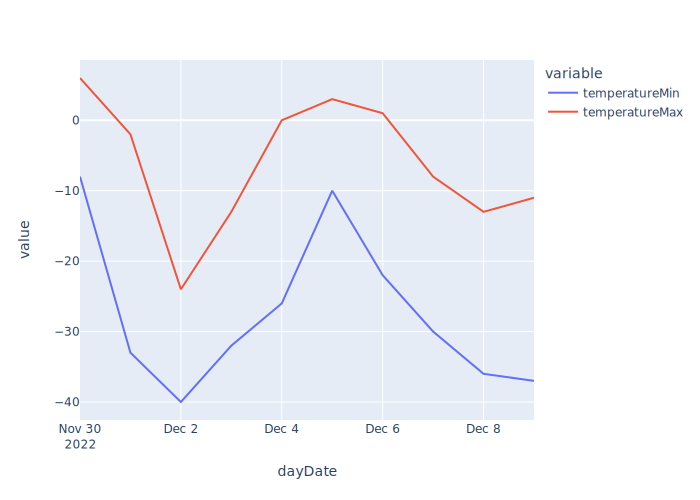

In [11]:
fig=px.line(df, x="dayDate", y=["temperatureMin", "temperatureMax"])
fig.show('svg')

Zuletzt wollen wir dieses Diagramm in einer Webseite auf einem Webserver anzeigen. Hier nutzen wir das Paket `dash` welches erlaubt eine Webseite mit Python-Befehlen zu erzeugen und darin interaktive Diagramme von Plotly mit anzuzeigen.

In [12]:
import dash

app = dash.Dash()

In [13]:
# da dies ein Jupyter Notebook ist nutzen wir eine besondere Version von Dash
from jupyter_dash import JupyterDash

app = JupyterDash()

Dann erzeugen wir eine Webseite mit einer Überschrift (`H1`), welche den Plot als `Graph` enthält.

In [14]:
app.layout = dash.html.Div(children = [
    dash.html.H1(children='Wetter in Rostock'),
    dash.dcc.Graph(id="fare_vs_age", figure=fig)
])

Und starten den Webserver.

In [15]:
app.run_server()

Dash app running on http://127.0.0.1:8083/


Dies startet einen Webserver auf den wir in einem Browser unter `http://127.0.0.1:8083/` zugreifen können. Er zeigt uns eine Webseite mit einem interaktiven Diagramm welches die Wetterdaten anzeigt.

![](images/wetter.png)